# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zahid Abdullah Nur Mukhlishin
- **Email:** zahidabdullahnm@gmail.com
- **ID Dicoding:** zahidabd

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca (seperti temperatur, kelembaban, kecepatan angin, dan kategori cuaca) memengaruhi jumlah pengguna sepeda baik yang terdaftar maupun tidak terdaftar?
- Kapan waktu penggunaan sepeda paling tinggi berdasarkan pola waktu harian (weekday vs weekend) dan pola per jam?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

print("Day Data Overview:")
print(day_data.head())
print("\nHour Data Overview:")
print(hour_data.head())

print("\nMissing Values in Day Data:")
print(day_data.isnull().sum())
print("\nMissing Values in Hour Data:")
print(hour_data.isnull().sum())

Day Data Overview:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour D

In [ ]:
print("\nDay Data Statistics:")
print(day_data.describe())
print("\nHour Data Statistics:")
print(hour_data.describe())


Day Data Statistics:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std  

**Insight:**
- Memeriksa apakah ada nilai yang hilang dalam kedua dataset.
- Memberikan statistik dasar untuk kolom numerik pada kedua dataset.

### Assessing Data

In [ ]:
print("\nDay Data Types:")
print(day_data.dtypes)
print("\nHour Data Types:")
print(hour_data.dtypes)

print("\nUnique Values in Categorical Columns (Day Data):")
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    if col in day_data.columns:
        print(f"{col}: {day_data[col].unique()}")

print("\nUnique Values in Categorical Columns (Hour Data):")
for col in categorical_columns:
    if col in hour_data.columns:
        print(f"{col}: {hour_data[col].unique()}")


Day Data Types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Hour Data Types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Unique Values in Categorical Columns (Day Data):
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]

Unique Val

In [ ]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
print("\nDay Data Outliers:")
for col in numerical_columns:
    if col in day_data.columns:
        Q1 = day_data[col].quantile(0.25)
        Q3 = day_data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = day_data[(day_data[col] < (Q1 - 1.5 * IQR)) | (day_data[col] > (Q3 + 1.5 * IQR))]
        print(f"{col}: {len(outliers)} outliers")

print("\nHour Data Outliers:")
for col in numerical_columns:
    if col in hour_data.columns:
        Q1 = hour_data[col].quantile(0.25)
        Q3 = hour_data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = hour_data[(hour_data[col] < (Q1 - 1.5 * IQR)) | (hour_data[col] > (Q3 + 1.5 * IQR))]
        print(f"{col}: {len(outliers)} outliers")


Day Data Outliers:
temp: 0 outliers
atemp: 0 outliers
hum: 2 outliers
windspeed: 13 outliers
casual: 44 outliers
registered: 0 outliers
cnt: 0 outliers

Hour Data Outliers:
temp: 0 outliers
atemp: 0 outliers
hum: 22 outliers
windspeed: 342 outliers
casual: 1192 outliers
registered: 680 outliers
cnt: 505 outliers


**Insight:**
- Pemeriksaan tipe data dan nilai unik untuk kolom kategori pada dataset harian dan per jam.
- Deteksi outlier pada kolom numerik menggunakan metode IQR.

### Cleaning Data

In [ ]:
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

day_data_cleaned = remove_outliers(day_data, numerical_columns)
hour_data_cleaned = remove_outliers(hour_data, numerical_columns)

print("\nOutliers removed from Day Data:")
print(day_data_cleaned.describe())
print("\nOutliers removed from Hour Data:")
print(hour_data_cleaned.describe())


Outliers removed from Day Data:
          instant      season          yr        mnth     holiday     weekday  \
count  676.000000  676.000000  676.000000  676.000000  676.000000  676.000000   
mean   358.355030    2.505917    0.476331    6.559172    0.026627    2.958580   
std    212.140732    1.122812    0.499809    3.504206    0.161111    1.933272   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    175.750000    1.000000    0.000000    3.000000    0.000000    1.000000   
50%    349.500000    3.000000    0.000000    7.000000    0.000000    3.000000   
75%    545.250000    4.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  676.000000  676.000000  676.000000  676.000000  676.000000  676.000000   
mean     0.724852    1.405325    0.489558    0.469260    0.633115    0.1867

In [ ]:
print("\nMissing Values After Cleaning (Day Data):")
print(day_data_cleaned.isnull().sum())
print("\nMissing Values After Cleaning (Hour Data):")
print(hour_data_cleaned.isnull().sum())


Missing Values After Cleaning (Day Data):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values After Cleaning (Hour Data):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Outlier pada kolom numerik dihilangkan dari kedua dataset menggunakan metode IQR.
- Setelah penghapusan outlier, memastikan tidak ada nilai yang hilang pada dataset yang telah dibersihkan.

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-10-3b4db822c634>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_data_cleaned, x='season', y='cnt', palette='Set2')


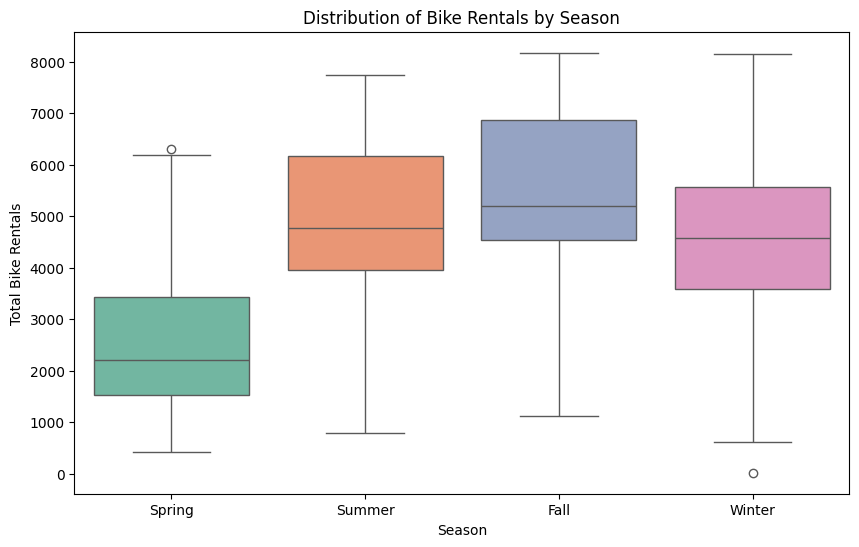

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data_cleaned, x='season', y='cnt', palette='Set2')
plt.title('Distribution of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

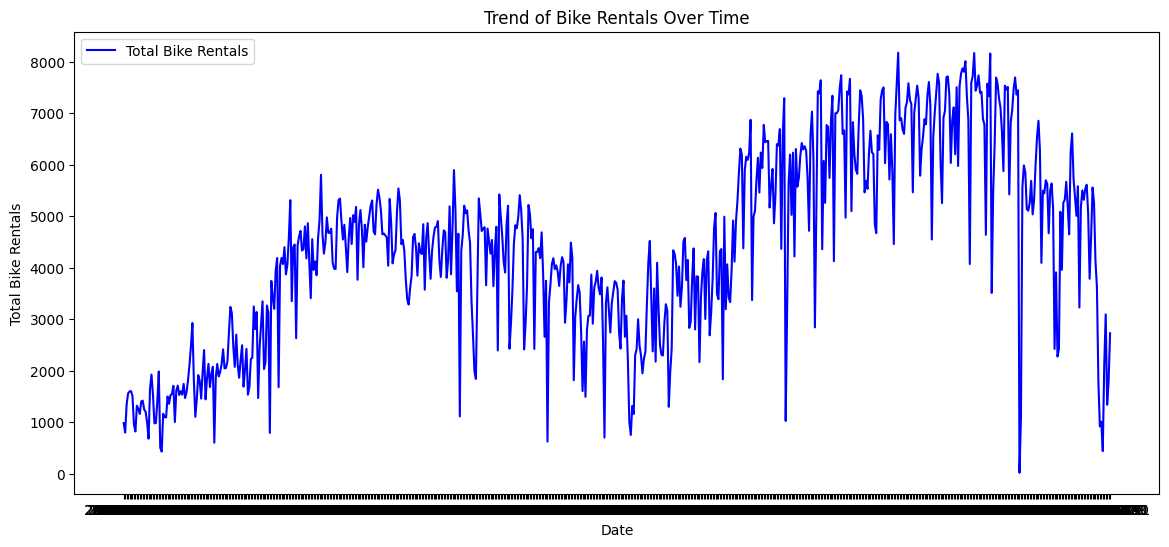

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(day_data_cleaned['dteday'], day_data_cleaned['cnt'], label='Total Bike Rentals', color='blue')
plt.title('Trend of Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.legend()
plt.show()

<ipython-input-13-c3241ed4021d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_data_cleaned, x='weathersit', y='cnt', palette='Blues_d')


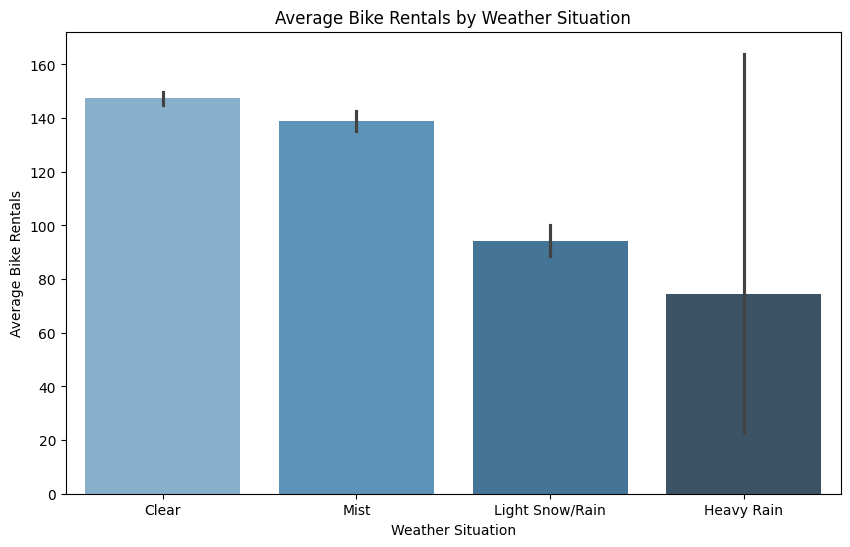

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_data_cleaned, x='weathersit', y='cnt', palette='Blues_d')
plt.title('Average Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Bike Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'])
plt.show()

**Insight:**
- Distribusi penyewaan sepeda berdasarkan musim.
- Tren penyewaan sepeda dari waktu ke waktu.
- Distribusi rata-rata penyewaan sepeda berdasarkan kondisi cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca (seperti temperatur, kelembaban, kecepatan angin, dan kategori cuaca) memengaruhi jumlah pengguna sepeda baik yang terdaftar maupun tidak terdaftar?

<ipython-input-15-d9f928b1b6f7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_data["weathersit"], y=day_data["cnt"], palette="viridis")


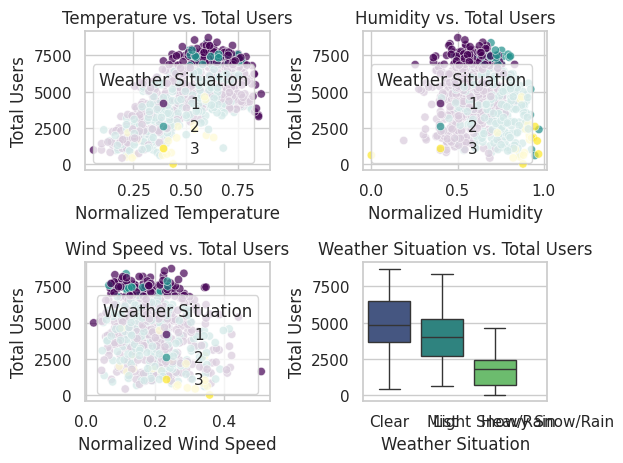

In [ ]:
# Plot 1: Temperature vs. Total Users
plt.subplot(2, 2, 1)
sns.scatterplot(x=day_data["temp"], y=day_data["cnt"], hue=day_data["weathersit"], palette="viridis", alpha=0.7)
plt.title("Temperature vs. Total Users")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Users")
plt.legend(title="Weather Situation")

# Plot 2: Humidity vs. Total Users
plt.subplot(2, 2, 2)
sns.scatterplot(x=day_data["hum"], y=day_data["cnt"], hue=day_data["weathersit"], palette="viridis", alpha=0.7)
plt.title("Humidity vs. Total Users")
plt.xlabel("Normalized Humidity")
plt.ylabel("Total Users")
plt.legend(title="Weather Situation")

# Plot 3: Wind Speed vs. Total Users
plt.subplot(2, 2, 3)
sns.scatterplot(x=day_data["windspeed"], y=day_data["cnt"], hue=day_data["weathersit"], palette="viridis", alpha=0.7)
plt.title("Wind Speed vs. Total Users")
plt.xlabel("Normalized Wind Speed")
plt.ylabel("Total Users")
plt.legend(title="Weather Situation")

# Plot 4: Weather Situation vs. Total Users
plt.subplot(2, 2, 4)
sns.boxplot(x=day_data["weathersit"], y=day_data["cnt"], palette="viridis")
plt.title("Weather Situation vs. Total Users")
plt.xlabel("Weather Situation")
plt.ylabel("Total Users")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Snow/Rain", "Heavy Snow/Rain"])

plt.tight_layout()
plt.show()

### Pertanyaan 2: Kapan waktu penggunaan sepeda paling tinggi berdasarkan pola waktu harian (weekday vs weekend) dan pola per jam?

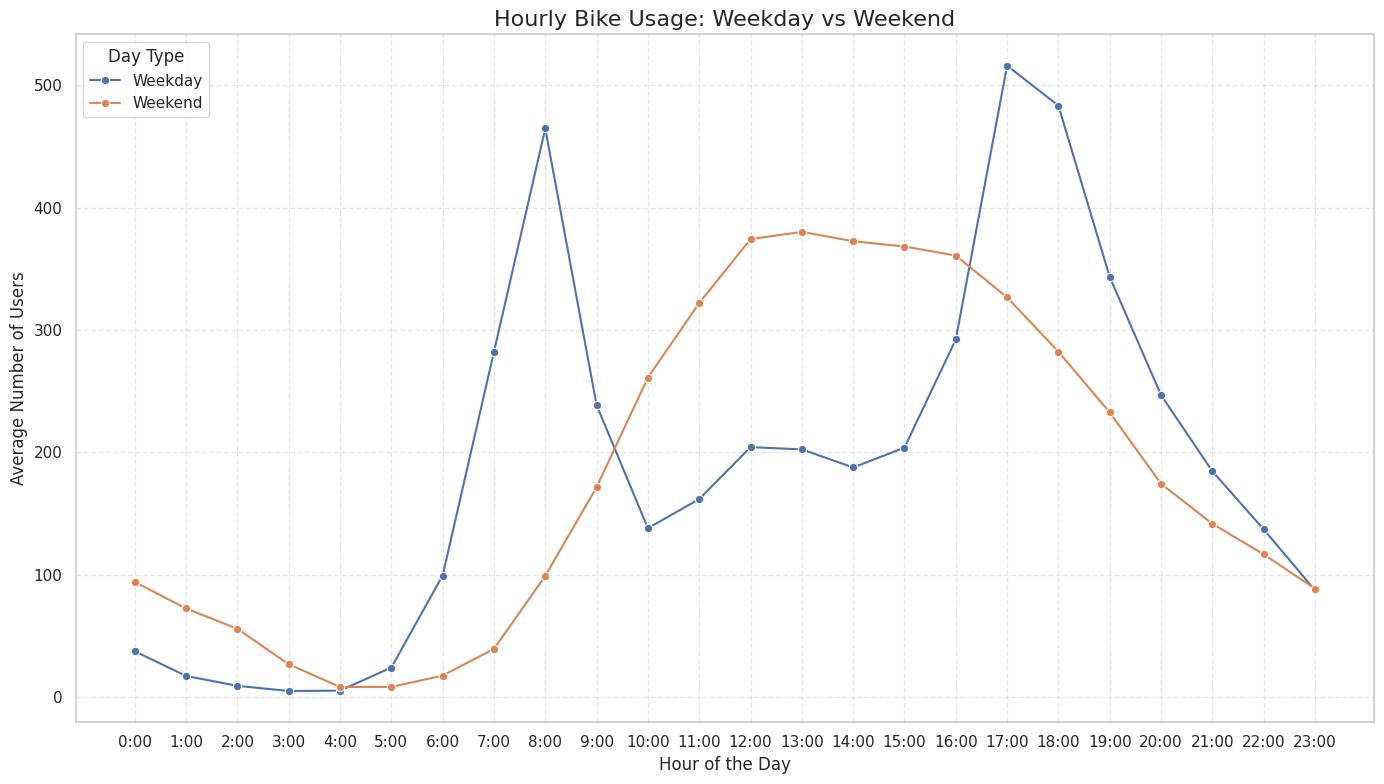

In [ ]:
hour_data["weekday"] = hour_data["weekday"].map({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
})

hour_data["day_type"] = hour_data["weekday"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

hourly_usage = hour_data.groupby(["hr", "day_type"])["cnt"].mean().reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(data=hourly_usage, x="hr", y="cnt", hue="day_type", marker="o")
plt.title("Hourly Bike Usage: Weekday vs Weekend", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Number of Users", fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{h}:00" for h in range(0, 24)])
plt.legend(title="Day Type", loc="upper left")
plt.grid(visible=True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


**Insight:**
- Cuaca hangat dan cerah merupakan kondisi yang paling optimal untuk penggunaan sepeda. Temperatur yang lebih tinggi mendorong peningkatan jumlah pengguna sepeda, terutama pengguna terdaftar, yang lebih konsisten menggunakan sepeda bahkan pada cuaca kurang optimal. Sebaliknya, pengguna tidak terdaftar lebih sensitif terhadap perubahan cuaca, seperti kelembapan tinggi, angin kencang, atau hujan dan salju. Cuaca ekstrem secara signifikan mengurangi jumlah pengguna sepeda, dengan dampak yang lebih besar pada pengguna tidak terdaftar. Secara keseluruhan, cuaca hangat, kelembapan sedang, angin rendah, dan kondisi cerah atau berawan ringan adalah kondisi yang paling ideal untuk memaksimalkan penggunaan sepeda.
- Pada hari kerja (weekday), penggunaan sepeda menunjukkan dua puncak utama, yaitu pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00–18:00. Pola ini mencerminkan aktivitas komuter, di mana pengguna terdaftar menggunakan sepeda untuk perjalanan ke dan dari tempat kerja. Sementara itu, pada akhir pekan (weekend), penggunaan sepeda lebih merata sepanjang hari, dengan puncak aktivitas pada siang hingga sore, sekitar pukul 11:00–16:00. Pola ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rekreasi pada akhir pekan. Operator layanan sepeda dapat memanfaatkan pola ini untuk mengoptimalkan ketersediaan sepeda selama jam sibuk di hari kerja dan di area rekreasi pada akhir pekan.

## Analisis Lanjutan

## Conclusion

- Kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda, baik yang terdaftar maupun tidak terdaftar. Temperatur yang lebih tinggi mendorong peningkatan jumlah pengguna, terutama pengguna terdaftar, yang cenderung lebih konsisten menggunakan sepeda bahkan pada cuaca kurang optimal. Pengguna tidak terdaftar juga meningkat pada cuaca hangat, tetapi lebih sensitif terhadap kondisi lingkungan yang tidak nyaman. Kelembapan yang sangat tinggi sedikit mengurangi jumlah pengguna, dengan dampak yang lebih besar pada pengguna tidak terdaftar. Kecepatan angin yang tinggi juga menurunkan penggunaan sepeda, terutama di kalangan pengguna tidak terdaftar. Kategori cuaca memiliki pengaruh paling signifikan, di mana cuaca cerah atau berawan ringan menarik jumlah pengguna tertinggi, sementara kondisi hujan atau salju lebat menyebabkan penurunan tajam, terutama pada pengguna tidak terdaftar. Secara keseluruhan, cuaca hangat dengan kelembapan sedang, angin rendah, dan kondisi cerah adalah kondisi optimal untuk memaksimalkan jumlah pengguna sepeda.
- Berdasarkan visualisasi, penggunaan sepeda menunjukkan pola yang berbeda antara hari kerja (weekday) dan akhir pekan (weekend). Pada hari kerja, puncak penggunaan sepeda terjadi pada jam-jam sibuk, yaitu pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00–18:00. Hal ini mencerminkan aktivitas komuter, di mana pengguna sepeda, terutama pengguna terdaftar, menggunakan sepeda untuk perjalanan kerja. Sebaliknya, pada akhir pekan, penggunaan sepeda lebih merata sepanjang hari dengan puncaknya terjadi pada siang hingga sore hari, sekitar pukul 11:00–16:00. Pola ini menunjukkan bahwa pada akhir pekan, sepeda lebih banyak digunakan untuk rekreasi dan aktivitas santai dibandingkan perjalanan rutin. Secara keseluruhan, waktu penggunaan sepeda paling tinggi adalah pagi dan sore pada hari kerja, serta siang hingga sore pada akhir pekan.